In [24]:
from pyspark.sql import SparkSession

# Настройка Spark
spark = SparkSession.builder \
    .appName("Employee_Salaries") \
    .getOrCreate()

sc = spark.sparkContext

# Считываем датасет
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Employee_Salaries_-_2023.csv", header=True, inferSchema=True)
# Схема датасета
df.printSchema()
# 10 записей из датасета
df.show(10)
# Создание таблицы
df.createOrReplaceTempView("Employee_Salaries")

root
 |-- Department: string (nullable = true)
 |-- Department_Name: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Base_Salary: double (nullable = true)
 |-- Overtime_Pay: double (nullable = true)
 |-- Longevity_Pay: double (nullable = true)
 |-- Grade: string (nullable = true)

+----------+--------------------+--------------------+------+-----------+------------+-------------+-----+
|Department|     Department_Name|            Division|Gender|Base_Salary|Overtime_Pay|Longevity_Pay|Grade|
+----------+--------------------+--------------------+------+-----------+------------+-------------+-----+
|       ABS|Alcohol Beverage ...|ABS 85 Administra...|     M|   175873.0|         0.0|          0.0|   M2|
|       ABS|Alcohol Beverage ...|ABS 85 Administra...|     M|  145613.36|         0.0|          0.0|   M3|
|       ABS|Alcohol Beverage ...|ABS 85 Administra...|     F|   136970.0|         0.0|          0.0|   M3|
|       ABS|Alco

In [25]:
row_count = df.count()
print(f"Количество строк в наборе данных: {row_count}")

unique_departments = df.select("Department").distinct().count()
unique_grades = df.select("Grade").distinct().count()
print(f"Количество отделов: {unique_departments}, Количество грэйдов: {unique_grades}")

Количество строк в наборе данных: 10291
Количество отделов: 42, Количество грэйдов: 99


In [31]:
# Упражнение 1. Средняя зарплата и количество сотрудников по отделам
average_base_salary_by_department = spark.sql(
    """
    SELECT
        Department,
        ROUND(AVG(`Base_Salary`), 1) as average_salary,
        COUNT(*) as count_of_employees
    FROM
        Employee_Salaries
    GROUP BY
        Department
    ORDER BY
        average_salary DESC
    """
)
average_base_salary_by_department.show(42)

+----------+--------------+------------------+
|Department|average_salary|count_of_employees|
+----------+--------------+------------------+
|       IGR|      165196.8|                 4|
|       ZAH|      143900.5|                 4|
|       ECM|      141388.4|                 2|
|       NDA|      140850.4|                20|
|       OLR|      138477.6|                 8|
|       OLO|      133616.0|                15|
|       TBS|      132441.2|               159|
|       CAT|      129680.9|                78|
|       OMB|      128164.8|                46|
|       CEX|      127919.7|                48|
|       OIG|      126637.9|                20|
|       ORE|      122101.8|                 6|
|       FIN|      115129.8|               121|
|       OFR|      112777.7|                 3|
|       DHS|      111115.3|                21|
|       OHR|      109816.3|                68|
|       HRC|      108182.2|                11|
|       OCP|      106803.5|                19|
|       CCL| 

In [35]:
# Упражнене 2. Средняя зарплата по гендерам
average_salary_by_gender = spark.sql(
    """
    SELECT
        Gender,
        ROUND(AVG(`Base_Salary`), 1) as average_salary,
        COUNT(*) as count_of_employees
    FROM
        Employee_Salaries
    GROUP BY
        Gender
    ORDER BY
        average_salary DESC
    """
)
average_salary_by_gender.show()

+------+--------------+------------------+
|Gender|average_salary|count_of_employees|
+------+--------------+------------------+
|     M|       92382.9|              5929|
|     F|       87497.5|              4362|
+------+--------------+------------------+



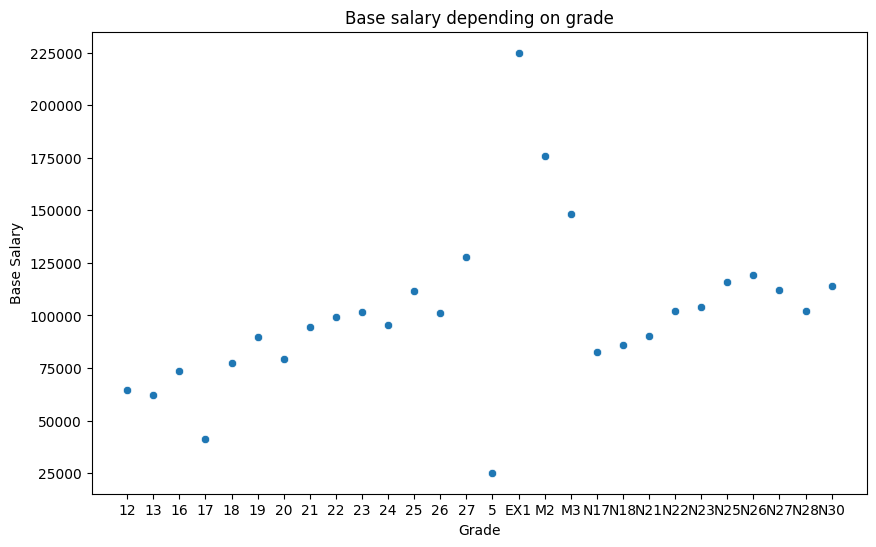

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Упражнение 3. Размер средней зарплаты в зависимости от грэйда для отдела DEP
# Получаем данные для визуализации
base_salary_depending_on_grade=spark.sql(
        """
    SELECT
        ROUND(AVG(`Base_Salary`), 1) as average_salary,
        Grade
    FROM
        Employee_Salaries
    WHERE
        Department="DEP"
    GROUP BY
        Grade
    ORDER BY
        Grade
    """
).toPandas()

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Grade", y="average_salary", data=base_salary_depending_on_grade)
plt.title("Base salary depending on grade")
plt.xlabel("Grade")
plt.ylabel("Base Salary")
plt.show()


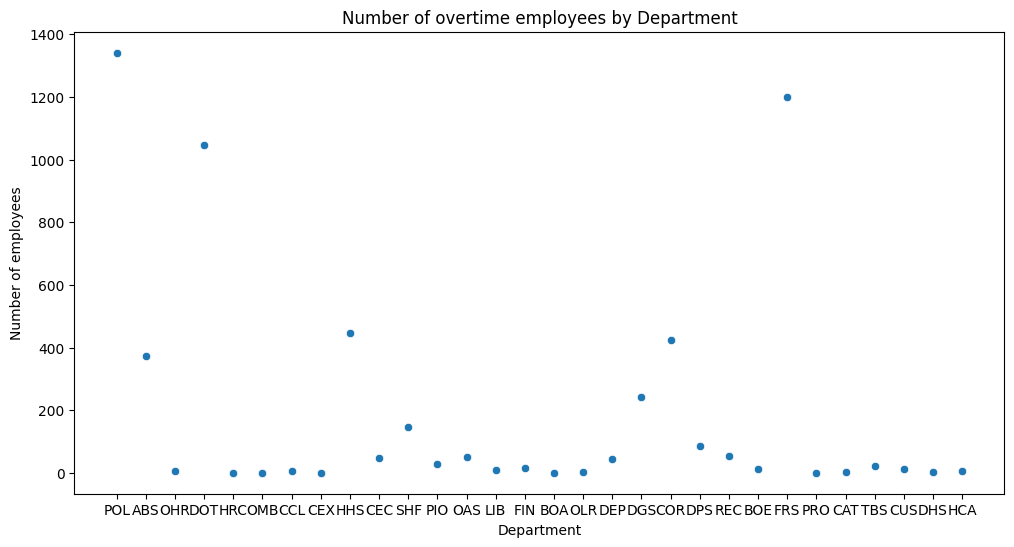

In [29]:
# Упражнение 4. Количество перерабатывающих сотрудников по отделам
number_of_overtime_employees=spark.sql(
        """
    SELECT
        COUNT(*) as number_of_employees,
        Department
    FROM
        Employee_Salaries
    WHERE
        Overtime_Pay > 0
    GROUP BY
        Department
    """
).toPandas()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Department", y="number_of_employees", data=number_of_overtime_employees)
plt.title("Number of overtime employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of employees")
plt.show()


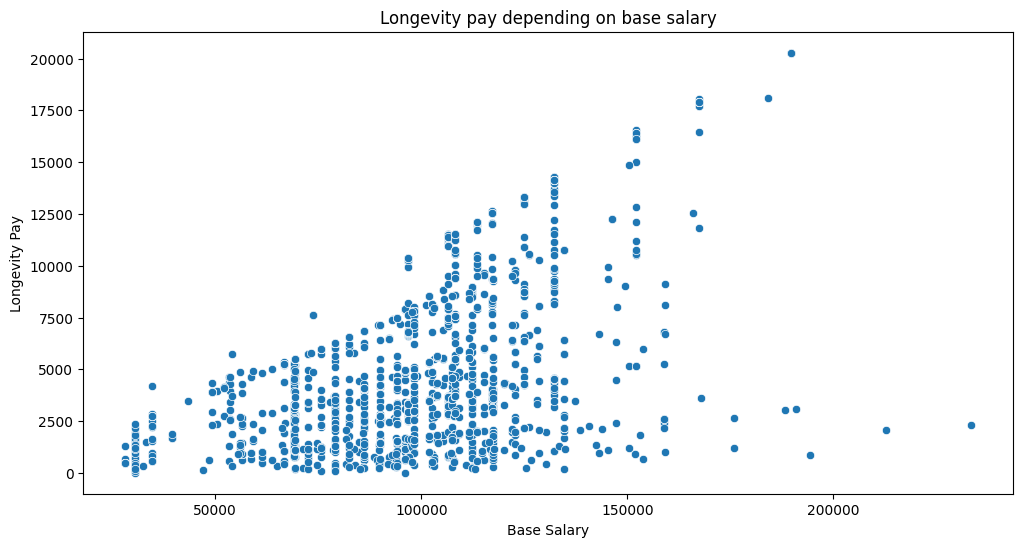

In [30]:
# Упражнение 5. Зависимость оплаты за стаж от базовой оплаты
longevity_pay_depending_on_base_salary=spark.sql(
        """
    SELECT
        Base_Salary,
        Longevity_Pay
    FROM
        Employee_Salaries
    WHERE
        Longevity_Pay > 0
    """
).toPandas()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Base_Salary", y="Longevity_Pay", data=longevity_pay_depending_on_base_salary)
plt.title("Longevity pay depending on base salary")
plt.xlabel("Base Salary")
plt.ylabel("Longevity Pay")
plt.show()